## Extract 2D body keypoints with OpenPose




## Infer 3D Human Model with [SMPLify-X](https://smpl-x.is.tue.mpg.de/)

In [ ]:
!pip install gdown
!gdown --id 1uu_1dR-vrgqI_GINDj9qyqJ_Ac24S2mu
!gdown --id 13Oy06ghEFwQrwFvwaCVQ4JBfShZj6DmN

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1uu_1dR-vrgqI_GINDj9qyqJ_Ac24S2mu
From (redirected): https://drive.google.com/uc?id=1uu_1dR-vrgqI_GINDj9qyqJ_Ac24S2mu&confirm=t&uuid=3f76017c-6735-4a7f-a2d1-a565882b391f
To: /content/V02_05.zip
100% 82.5M/82.5M [00:02<00:00, 31.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=13Oy06ghEFwQrwFvwaCVQ4JBfShZj6DmN
From (redirected): https://drive.google.com/uc?id=13Oy06ghEFwQrwFvwaCVQ4JBfShZj6DmN&confirm=t&uuid=6eb6e4fa-3c7a-4719-b4df-fb3a76de7be3
To: /content/models_smplx_v

In [ ]:
# %cd /content/
# !mkdir /content/data
# !mkdir /content/data/images
# !mkdir /content/data/keypoints

In [ ]:
# @title Install SMPLify-X and other dependencies

%cd /content
!pip install chumpy
!pip install smplx[all]
!git clone https://github.com/vchoutas/smplx
%cd smplx
!python setup.py install

#vposer
!pip install git+https://github.com/nghorbani/configer
!pip install git+https://github.com/nghorbani/human_body_prior
#!pip install git+https://github.com/sergeyprokudin/human_body_prior

#!pip install torch==1.1.0
%cd /content
#!git clone https://github.com/sergeyprokudin/smplify-x
!git clone https://github.com/KyujinHan/Smplify-X-Perfect-Implementation
%cd /content/Smplify-X-Perfect-Implementation
!pip install -r requirements.txt # Error is okay. Just pass.

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58264 sha256=2153053f5aef6e9b3b6e0bb4e957020a171a54c41d9f32d9dc1d1c8d95569932
  Stored in directory: /root/.cache/pip/wheels/e0/c1/ef/29ba7be03653a29ef6f2c3e1956d6c4d8877f2b243af411db1
Successfully built chumpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.7/703.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 941.1/941.1 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.9 MB/s eta 0:00:00
  Created wheel for PyOpenGL: filename=PyOpenGL-3.1.0-py3-none-any.whl si

In [ ]:
%cd /content/

SMPLX_ZIP_PATH = '/content/models_smplx_v1_1.zip'
VPOSER_ZIP_PATH = '/content/V02_05.zip'

SMPLX_MODEL_PATH = '/content/smplx'
!mkdir $SMPLX_MODEL_PATH
!unzip -n $SMPLX_ZIP_PATH -d $SMPLX_MODEL_PATH
VPOSER_MODEL_PATH = '/content/vposer'
!mkdir $VPOSER_MODEL_PATH
!unzip -n $VPOSER_ZIP_PATH -d $VPOSER_MODEL_PATH

/content
mkdir: cannot create directory ‘/content/smplx’: File exists
Archive:  /content/models_smplx_v1_1.zip
   creating: /content/smplx/models/
   creating: /content/smplx/models/smplx/
  inflating: /content/smplx/models/smplx/SMPLX_NEUTRAL.npz  
 extracting: /content/smplx/models/smplx/version.txt  
  inflating: /content/smplx/models/smplx/SMPLX_MALE.pkl  
  inflating: /content/smplx/models/smplx/SMPLX_FEMALE.npz  
 extracting: /content/smplx/models/smplx/smplx_npz.zip  
  inflating: /content/smplx/models/smplx/SMPLX_MALE.npz  
  inflating: /content/smplx/models/smplx/SMPLX_FEMALE.pkl  
  inflating: /content/smplx/models/smplx/SMPLX_NEUTRAL.pkl  
Archive:  /content/V02_05.zip
   creating: /content/vposer/V02_05/
  inflating: /content/vposer/V02_05/V02_05.log  
   creating: /content/vposer/V02_05/snapshots/
  inflating: /content/vposer/V02_05/snapshots/V02_05_epoch=13_val_loss=0.03.ckpt  
  inflating: /content/vposer/V02_05/snapshots/V02_05_epoch=08_val_loss=0.03.ckpt  
  inflating:

In [ ]:
## 추가 module donwload
!pip install configargparse
!pip install omegaconf
!pip install loguru

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=69833be0de1cd5b832c006362540ff42c7453ac7a300c2d4a718abdd7cb20a26
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
!rm -rf /content/data/smplifyx_results
%cd /content/Smplify-X-Perfect-Implementation
!git pull origin

/content/Smplify-X-Perfect-Implementation
Already up to date.


In [ ]:
%cd /content/
!gdown --id 1t3_VqiwNogGeZ3d7E42ym1kPMvqaiia2

/content
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1t3_VqiwNogGeZ3d7E42ym1kPMvqaiia2
To: /content/data.zip
100% 14.6M/14.6M [00:00<00:00, 64.1MB/s]


In [ ]:
!unzip /content/data.zip -d /content/data

Archive:  /content/data.zip
   creating: /content/data/output/
   creating: /content/data/output/images/
  inflating: /content/data/output/images/frame_0000_rendered.png  
  inflating: /content/data/output/images/frame_0001_rendered.png  
  inflating: /content/data/output/images/frame_0002_rendered.png  
  inflating: /content/data/output/images/frame_0003_rendered.png  
  inflating: /content/data/output/images/frame_0004_rendered.png  
  inflating: /content/data/output/images/frame_0005_rendered.png  
  inflating: /content/data/output/images/frame_0006_rendered.png  
  inflating: /content/data/output/images/frame_0007_rendered.png  
  inflating: /content/data/output/images/frame_0008_rendered.png  
  inflating: /content/data/output/images/frame_0009_rendered.png  
  inflating: /content/data/output/images/frame_0010_rendered.png  
  inflating: /content/data/output/images/frame_0011_rendered.png  
  inflating: /content/data/output/images/frame_0012_rendered.png  
  inflating: /content/da

In [ ]:
import os
import json

# Specify the folder containing the JSON files
folder_path = '/content/data/output/keypoints'
# Function to modify JSON structure
def modify_json(json_data):
    # Check if 'people' and 'face_keypoints_2d' are structured correctly
    if 'people' in json_data and isinstance(json_data['people'], list) and len(json_data['people']) > 0:
        person = json_data['people'][0]

        # If 'face_keypoints_2d' is missing or doesn't have 210 zeros, add it
        if 'face_keypoints_2d' not in person or len(person['face_keypoints_2d']) != 210:
            person['face_keypoints_2d'] = [0] * 210  # Add exactly 210 zeros

    return json_data

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)

        try:
            # Open and load each JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)

            # Modify the JSON data
            modified_data = modify_json(data)

            # Save the modified data back to the file
            with open(file_path, 'w') as file:
                json.dump(modified_data, file, indent=4)

            print(f"Modified: {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print("All files have been modified.")



Modified: frame_0453_keypoints.json
Modified: frame_0376_keypoints.json
Modified: frame_0122_keypoints.json
Modified: frame_0221_keypoints.json
Modified: frame_0030_keypoints.json
Modified: frame_0070_keypoints.json
Modified: frame_0320_keypoints.json
Modified: frame_0377_keypoints.json
Modified: frame_0214_keypoints.json
Modified: frame_0469_keypoints.json
Modified: frame_0386_keypoints.json
Modified: frame_0418_keypoints.json
Modified: frame_0258_keypoints.json
Modified: frame_0043_keypoints.json
Modified: frame_0136_keypoints.json
Modified: frame_0205_keypoints.json
Modified: frame_0109_keypoints.json
Modified: frame_0170_keypoints.json
Modified: frame_0102_keypoints.json
Modified: frame_0078_keypoints.json
Modified: frame_0207_keypoints.json
Modified: frame_0013_keypoints.json
Modified: frame_0226_keypoints.json
Modified: frame_0290_keypoints.json
Modified: frame_0134_keypoints.json
Modified: frame_0159_keypoints.json
Modified: frame_0061_keypoints.json
Modified: frame_0447_keypoin

In [ ]:
import os

# Specify the folder containing your files
folder_path = r'/content/data/output/images'

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file starts with "frame_" and ends with "_rendered"
    if filename.startswith("frame_") and filename.endswith("_rendered.png"):
        # Construct the new filename by removing "_rendered"
        new_filename = filename.replace("_rendered", "")

        # Get the full paths to rename the file
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_filename)

        # Print old and new file paths for debugging
        print(f'Attempting to rename: {old_file} -> {new_file}')

        # Rename the file
        os.rename(old_file, new_file)
        print(f'Renamed: {old_file} -> {new_file}')
    else:
        print(f'Skipping: {filename}')  # Print which files are being skipped


Attempting to rename: /content/data/output/images/frame_0286_rendered.png -> /content/data/output/images/frame_0286.png
Renamed: /content/data/output/images/frame_0286_rendered.png -> /content/data/output/images/frame_0286.png
Attempting to rename: /content/data/output/images/frame_0401_rendered.png -> /content/data/output/images/frame_0401.png
Renamed: /content/data/output/images/frame_0401_rendered.png -> /content/data/output/images/frame_0401.png
Attempting to rename: /content/data/output/images/frame_0039_rendered.png -> /content/data/output/images/frame_0039.png
Renamed: /content/data/output/images/frame_0039_rendered.png -> /content/data/output/images/frame_0039.png
Attempting to rename: /content/data/output/images/frame_0117_rendered.png -> /content/data/output/images/frame_0117.png
Renamed: /content/data/output/images/frame_0117_rendered.png -> /content/data/output/images/frame_0117.png
Attempting to rename: /content/data/output/images/frame_0199_rendered.png -> /content/data/o

In [ ]:
gender = 'male'
%cd /content/Smplify-X-Perfect-Implementation
!python smplifyx/main.py --config cfg_files/fit_smplx.yaml \
    --data_folder  /content/data/output \
    --output_folder /content/data/smplifyx_results \
    --visualize=True \
    --gender=$gender \
    --model_folder /content/smplx/models \
    --vposer_ckpt /content/vposer/V02_05\
    --part_segm_fn smplx_parts_segm.pkl

Streaming output truncated to the last 5000 lines.
Camera initialization done after 2.9414
Camera initialization final loss 88.5974
Orientation:   0% 0/1 [00:00<?, ?it/s]
Stage:   0% 0/5 [00:00<?, ?it/s]
Stage 000 done after 2.7816 seconds

Orientation:   0% 0/1 [00:02<?, ?it/s]
Stage:  20% 1/5 [00:02<00:11,  2.78s/it]
Stage 001 done after 1.1489 seconds

Orientation:   0% 0/1 [00:03<?, ?it/s]
Stage:  40% 2/5 [00:03<00:05,  1.82s/it]
Stage 002 done after 3.6942 seconds

Orientation:   0% 0/1 [00:07<?, ?it/s]
Stage:  60% 3/5 [00:07<00:05,  2.68s/it]
Stage 003 done after 11.0403 seconds

Orientation:   0% 0/1 [00:18<?, ?it/s]
Stage:  80% 4/5 [00:18<00:05,  5.98s/it]
Stage 004 done after 1.3921 seconds

Orientation:   0% 0/1 [00:20<?, ?it/s]
Stage: 100% 5/5 [00:20<00:00,  4.01s/it]
Body fitting Orientation 0 done after 20.0697 seconds
Body final loss val = 577.22168
Orientation: 100% 1/1 [00:20<00:00, 20.07s/it]
saved input image to /content/data/smplifyx_results/input_images/00228.png
me

In [ ]:
!zip -r /content/data1.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/output/ (stored 0%)
  adding: content/data/output/keypoints/ (stored 0%)
  adding: content/data/output/keypoints/frame_0453_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0376_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0122_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0221_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0030_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0070_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0320_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0377_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0214_keypoints.json (deflated 91%)
  adding: content/data/output/keypoints/frame_0469_keypoints.json (deflated 88%)
  adding: content/data/output/keypoints/frame_0386_keypoin

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Move the Zip File to Google Drive
!cp /content/data3.zip /content/drive/MyDrive/


Mounted at /content/drive


In [ ]:
!cp /content/data3.zip /content/drive/MyDrive/

# mesh 시각화

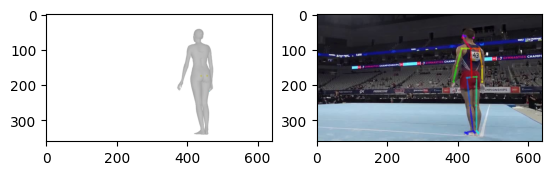

In [ ]:
## image
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

img1 = Image.open('/content/data/smplifyx_results/rendered_smplifyx_meshes/00000.png')
img2 = Image.open('/content/data/images/floor_5_sec_000000000000.jpg')
ax1.imshow(img1)
ax2.imshow(img2)

In [ ]:
%rm -r /content/data